# Clustering Week 06
Raihana Fawaz (1103210102)

In [24]:
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pd.read_csv('clusteringweek06.csv')

In [26]:
# Baca data dalam chunks
chunk_size = 1000
data_list = []
for chunk in pd.read_csv('clusteringweek06.csv', chunksize=chunk_size):
    data_list.append(chunk)

# Gabungkan data dari chunks
data = pd.concat(data_list, ignore_index=True)

In [27]:
# Gabungkan semua chunks menjadi satu DataFrame yang lebih kecil
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.1, random_state=0)  # Sampling 10% dari data

In [28]:
# Standarisasi data numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [29]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)

K-Means Silhouette Score: 0.18735384032613425
K-Means Davies-Bouldin Score: 1.3798722085537432
K-Means Calinski-Harabasz Score: 196.3621230918941


In [30]:
# MiniBatchKMeans Clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk MiniBatchKMeans
minibatch_silhouette = silhouette_score(data_scaled, minibatch_labels)
minibatch_davies = davies_bouldin_score(data_scaled, minibatch_labels)
minibatch_calinski = calinski_harabasz_score(data_scaled, minibatch_labels)

print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)
print("MiniBatchKMeans Davies-Bouldin Score:", minibatch_davies)
print("MiniBatchKMeans Calinski-Harabasz Score:", minibatch_calinski)

MiniBatchKMeans Silhouette Score: 0.3229145860759916
MiniBatchKMeans Davies-Bouldin Score: 1.2621642842524174
MiniBatchKMeans Calinski-Harabasz Score: 211.46758667962467


In [31]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)

Agglomerative Clustering Silhouette Score: 0.34170927768963266
Agglomerative Clustering Davies-Bouldin Score: 1.471133488100411
Agglomerative Clustering Calinski-Harabasz Score: 227.52279278362747


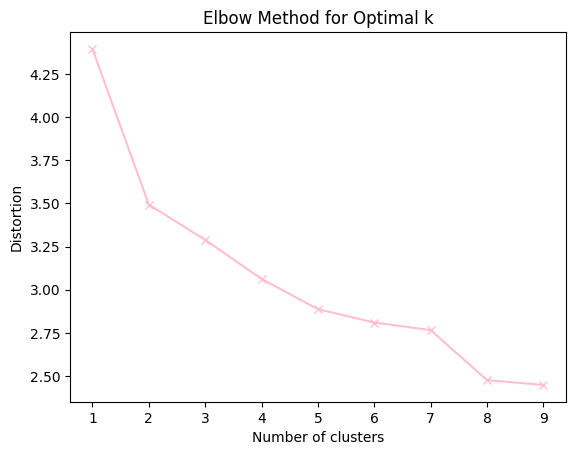

In [33]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, 'x-', color='pink')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


1. **Silhouette Score**: Model KMeans menghasilkan *Silhouette Score* tertinggi di antara ketiga model, menunjukkan bahwa cluster yang terbentuk cukup terpisah dengan jelas. MiniBatchKMeans memiliki skor yang sedikit lebih rendah dari KMeans, namun masih cukup tinggi untuk menunjukkan pemisahan cluster yang baik. Sebaliknya, Agglomerative Clustering memiliki *Silhouette Score* terendah, menunjukkan bahwa cluster yang terbentuk tidak cukup terpisah dan cenderung memiliki overlap antar cluster.

2. **Davies-Bouldin Score**: KMeans kembali unggul dengan *Davies-Bouldin Score* terendah, yang menandakan bahwa cluster yang terbentuk memiliki tingkat kekompakan yang baik dan saling berjauhan satu sama lain. MiniBatchKMeans memiliki *Davies-Bouldin Score* yang sedikit lebih tinggi daripada KMeans, menandakan bahwa tingkat kekompakannya sedikit kurang. Agglomerative Clustering mencatat nilai *Davies-Bouldin Score* tertinggi, yang menunjukkan bahwa cluster yang terbentuk kurang kompak dan saling berdekatan, sehingga kualitas clusteringnya tidak optimal.

3. **Calinski-Harabasz Score**: Model KMeans kembali menunjukkan performa terbaik dengan *Calinski-Harabasz Score* tertinggi, yang menandakan densitas cluster yang baik serta jarak yang cukup besar antar cluster. MiniBatchKMeans memiliki skor yang mendekati KMeans, menunjukkan bahwa meskipun tidak setinggi KMeans, densitas cluster yang dihasilkan masih cukup baik. Sementara itu, Agglomerative Clustering memiliki *Calinski-Harabasz Score* terendah, yang menandakan bahwa cluster yang terbentuk memiliki densitas yang rendah dan kurang terpisah satu sama lain.

Secara keseluruhan, KMeans merupakan model terbaik untuk dataset ini pada ketiga metrik evaluasi, diikuti oleh MiniBatchKMeans sebagai alternatif yang memadai, sementara Agglomerative Clustering tidak direkomendasikan karena performanya yang rendah pada semua metrik.